In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


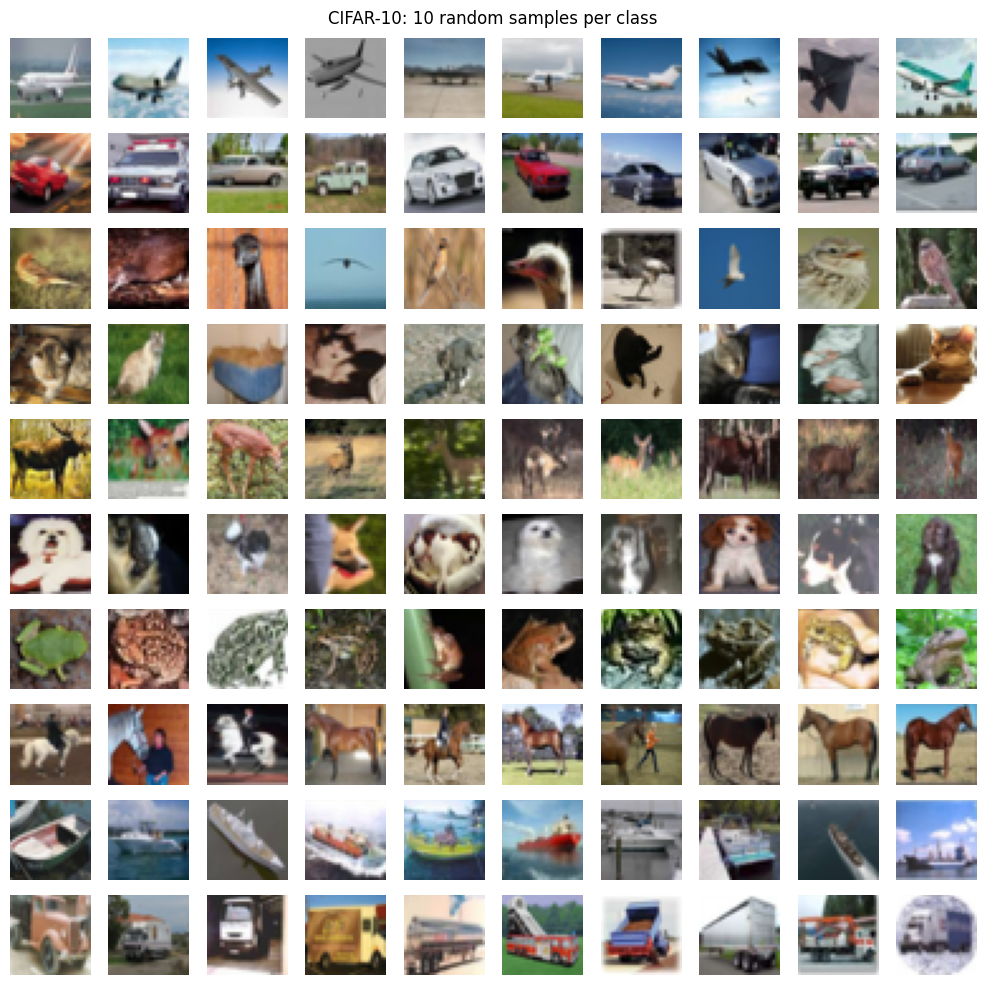

In [7]:
# --- visualise 10 random images per class in a 10×10 grid,
# --- normalise images and one-hot encode labels

class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]
num_classes = 10

# 10 x 10 grid: each row = one class, 10 random samples
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.suptitle("CIFAR-10: 10 random samples per class", fontsize=12)

y_train_flat = y_train.reshape(-1)

for c in range(num_classes):
    # indices of all train images of class c
    idxs = np.where(y_train_flat == c)[0]
    # choose 10 random examples from that class
    chosen = np.random.choice(idxs, size=10, replace=False)

    for j, idx in enumerate(chosen):
        ax = axes[c, j]
        ax.imshow(x_train[idx]) # Changed X_train to x_train
        ax.axis("off")
        if j == 0:
            ax.set_ylabel(class_names[c],
                          fontsize=7, rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

# normalise images to [0, 1]
X_train = x_train.astype("float32") / 255.0 # Changed X_train = X_train to X_train = x_train
X_test  = x_test.astype("float32") / 255.0  # Changed X_test = X_test to X_test = x_test

# one-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test,  num_classes)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.backend import clear_session # Import clear_session

clear_session()

baseline_model = Sequential([
    Conv2D(32, (3, 3), activation="relu",
           padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

baseline_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,898 (2.01 MB)

 Trainable params: 525,898 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
baseline_model.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_baseline = baseline_model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=512,
    validation_data=(X_test, y_test),
    verbose=2
)


Epoch 1/15
98/98 - 6s - 66ms/step - accuracy: 0.2049 - loss: 2.2140 - val_accuracy: 0.2546 - val_loss: 2.1228
Epoch 2/15
98/98 - 1s - 11ms/step - accuracy: 0.2746 - loss: 2.0570 - val_accuracy: 0.2856 - val_loss: 2.0003
Epoch 3/15
98/98 - 1s - 11ms/step - accuracy: 0.3104 - loss: 1.9643 - val_accuracy: 0.3067 - val_loss: 1.9447
Epoch 4/15
98/98 - 1s - 12ms/step - accuracy: 0.3323 - loss: 1.9073 - val_accuracy: 0.3117 - val_loss: 1.9154
Epoch 5/15
98/98 - 1s - 11ms/step - accuracy: 0.3492 - loss: 1.8686 - val_accuracy: 0.3363 - val_loss: 1.8679
Epoch 6/15
98/98 - 1s - 11ms/step - accuracy: 0.3593 - loss: 1.8357 - val_accuracy: 0.3540 - val_loss: 1.8255
Epoch 7/15
98/98 - 1s - 11ms/step - accuracy: 0.3669 - loss: 1.8097 - val_accuracy: 0.3759 - val_loss: 1.7851
Epoch 8/15
98/98 - 1s - 11ms/step - accuracy: 0.3798 - loss: 1.7764 - val_accuracy: 0.3659 - val_loss: 1.7715
Epoch 9/15
98/98 - 1s - 11ms/step - accuracy: 0.3881 - loss: 1.7531 - val_accuracy: 0.3973 - val_loss: 1.7297
Epoch 10/1

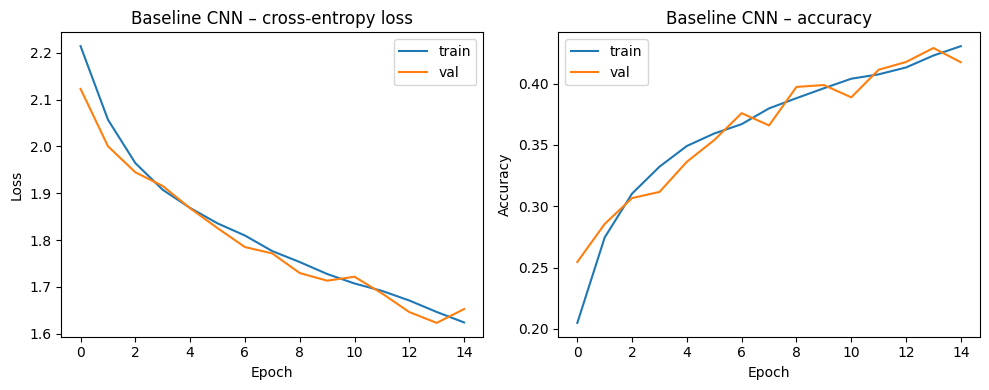

In [10]:
# loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_baseline.history["loss"], label="train")
plt.plot(history_baseline.history["val_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Baseline CNN – cross-entropy loss")
plt.legend()

# accuracy
plt.subplot(1,2,2)
plt.plot(history_baseline.history["accuracy"], label="train")
plt.plot(history_baseline.history["val_accuracy"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Baseline CNN – accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
clear_session()

vgg_small = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding="same",
           input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

vgg_small.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,069,386 (4.08 MB)

 Trainable params: 1,069,386 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
vgg_small.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_vgg_small = vgg_small.fit(
    X_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(X_test, y_test),
    verbose=2
)


Epoch 1/50
98/98 - 11s - 109ms/step - accuracy: 0.1023 - loss: 2.2989 - val_accuracy: 0.1373 - val_loss: 2.2910
Epoch 2/50
98/98 - 4s - 36ms/step - accuracy: 0.2013 - loss: 2.2619 - val_accuracy: 0.2266 - val_loss: 2.1995
Epoch 3/50
98/98 - 4s - 37ms/step - accuracy: 0.2581 - loss: 2.1023 - val_accuracy: 0.2142 - val_loss: 2.1900
Epoch 4/50
98/98 - 4s - 36ms/step - accuracy: 0.2921 - loss: 1.9884 - val_accuracy: 0.3104 - val_loss: 1.9278
Epoch 5/50
98/98 - 4s - 37ms/step - accuracy: 0.3289 - loss: 1.9144 - val_accuracy: 0.2904 - val_loss: 2.0204
Epoch 6/50
98/98 - 4s - 37ms/step - accuracy: 0.3474 - loss: 1.8568 - val_accuracy: 0.3636 - val_loss: 1.8115
Epoch 7/50
98/98 - 4s - 37ms/step - accuracy: 0.3646 - loss: 1.8092 - val_accuracy: 0.3743 - val_loss: 1.7753
Epoch 8/50
98/98 - 4s - 37ms/step - accuracy: 0.3806 - loss: 1.7643 - val_accuracy: 0.3847 - val_loss: 1.7374
Epoch 9/50
98/98 - 4s - 37ms/step - accuracy: 0.3866 - loss: 1.7398 - val_accuracy: 0.3838 - val_loss: 1.7399
Epoch 10

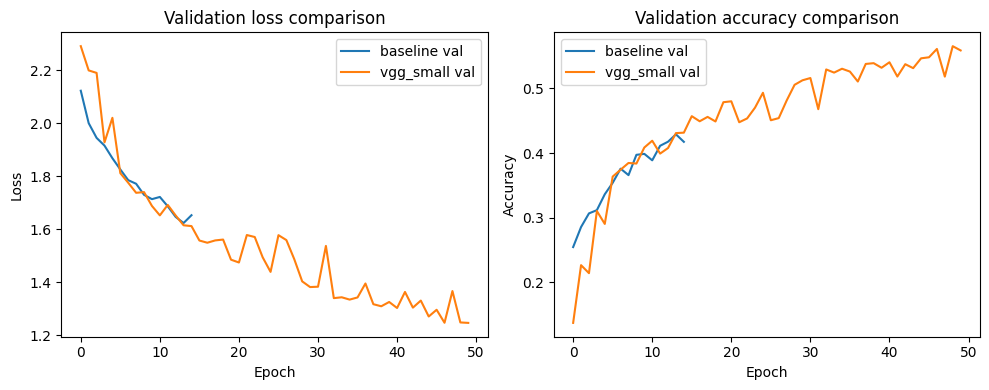

In [13]:
# loss comparison
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_baseline.history["val_loss"], label="baseline val")
plt.plot(history_vgg_small.history["val_loss"], label="vgg_small val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation loss comparison")
plt.legend()

# accuracy comparison
plt.subplot(1,2,2)
plt.plot(history_baseline.history["val_accuracy"], label="baseline val")
plt.plot(history_vgg_small.history["val_accuracy"], label="vgg_small val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation accuracy comparison")
plt.legend()

plt.tight_layout()
plt.show()

# (comment in the notebook)
# Typically the deeper VGG-style model learns more expressive features,
# leading to lower validation loss and higher accuracy than the shallow
# baseline, although it might overfit a bit more if trained too long.


In [14]:
import tensorflow as tf

X_train_64 = tf.image.resize(X_train, (64, 64)).numpy()
X_test_64  = tf.image.resize(X_test,  (64, 64)).numpy()


In [15]:
clear_session()

vgg_full = Sequential([
    # block 1: 2×64
    Conv2D(64, (3, 3), activation="relu", padding="same",
           input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),

    # block 2: 2×128
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),

    # block 3: 2×256
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

vgg_full.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
vgg_full.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_vgg_full = vgg_full.fit(
    X_train_64, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(X_test_64, y_test),
    verbose=2
)


Epoch 1/50
98/98 - 127s - 1s/step - accuracy: 0.1273 - loss: 2.2974 - val_accuracy: 0.1586 - val_loss: 2.2908
Epoch 2/50
98/98 - 38s - 391ms/step - accuracy: 0.1576 - loss: 2.2756 - val_accuracy: 0.1602 - val_loss: 2.2468
Epoch 3/50
98/98 - 38s - 390ms/step - accuracy: 0.2088 - loss: 2.1797 - val_accuracy: 0.1888 - val_loss: 2.1949
Epoch 4/50
98/98 - 38s - 392ms/step - accuracy: 0.2499 - loss: 2.1067 - val_accuracy: 0.2885 - val_loss: 2.0166
Epoch 5/50
98/98 - 38s - 392ms/step - accuracy: 0.2892 - loss: 2.0234 - val_accuracy: 0.3366 - val_loss: 1.9199
Epoch 6/50
98/98 - 38s - 393ms/step - accuracy: 0.3136 - loss: 1.9436 - val_accuracy: 0.3044 - val_loss: 1.9617
Epoch 7/50
98/98 - 38s - 392ms/step - accuracy: 0.3423 - loss: 1.8691 - val_accuracy: 0.3251 - val_loss: 1.9290
Epoch 8/50
98/98 - 38s - 392ms/step - accuracy: 0.3637 - loss: 1.8073 - val_accuracy: 0.3976 - val_loss: 1.7138
Epoch 9/50
98/98 - 38s - 392ms/step - accuracy: 0.3886 - loss: 1.7416 - val_accuracy: 0.4055 - val_loss: 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


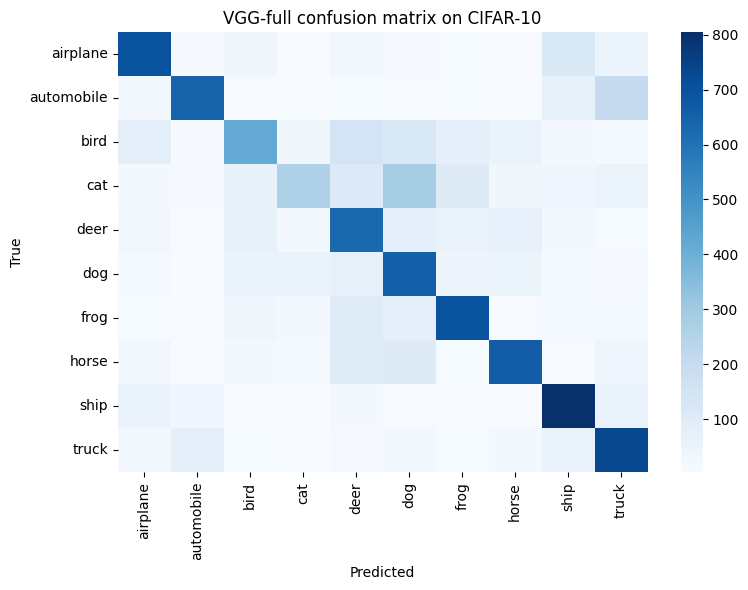

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred_probs = vgg_full.predict(X_test_64)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
y_test_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("VGG-full confusion matrix on CIFAR-10")
plt.tight_layout()
plt.show()

# In your written comments you can point out which classes are most
# frequently confused (e.g. cat vs dog, automobile vs truck, etc.).
